___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, Neural Network*** algorithms and ***SMOTE*** technique. Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

At the end of the project, you will have the opportunity to deploy your model by ***Flask API***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement (flask api) as well as the theory behind Logistic Regression, Random Forest, Neural Network.*



---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can show the distribution of the target variable's classes over other variables. 
Also, it is necessary to take into account missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the SMOTE technique used to increase the sample for unbalanced data. Next, rebuild your Logistic Regression model with SMOTE applied data to observe its effect.

Then, you will use three different algorithms in the model building phase. You have applied Logistic Regression and Random Forest in your previous projects. However, the Deep Learning Neural Network algorithm will appear for the first time.

In the final step, you will deploy your model using ***Flask API***.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Exploratory Data Analysis
- Data Cleaning



    
#### 2. Data Preprocessing

- Scaling
- Train - Test Split


#### 3. Model Building

- Logistic Regression without SMOTE
- Apply SMOTE
- Logistic Regression with SMOTE
- Random Forest Classifier with SMOTE
- Neural Network

#### 4. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [63]:
df=pd.read_csv('creditcard.zip')

In [64]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


In [65]:
df.shape

(284807, 31)

In [66]:
df.duplicated().sum()

1081

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [68]:
# Change display settings to 2 decimal format
pd.options.display.float_format = '{:.2f}'.format

In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.00,94813.86,47488.15,0.00,54201.50,84692.00,139320.50,172792.00
V1,284807.00,0.00,1.96,-56.41,-0.92,0.02,1.32,2.45
V2,284807.00,0.00,1.65,-72.72,-0.60,0.07,0.80,22.06
V3,284807.00,-0.00,1.52,-48.33,-0.89,0.18,1.03,9.38
V4,284807.00,0.00,1.42,-5.68,-0.85,-0.02,0.74,16.88
V5,284807.00,-0.00,1.38,-113.74,-0.69,-0.05,0.61,34.80
V6,284807.00,0.00,1.33,-26.16,-0.77,-0.27,0.40,73.30
V7,284807.00,-0.00,1.24,-43.56,-0.55,0.04,0.57,120.59
V8,284807.00,-0.00,1.19,-73.22,-0.21,0.02,0.33,20.01
V9,284807.00,-0.00,1.10,-13.43,-0.64,-0.05,0.60,15.59


### Exploratory Data Analysis

In [70]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [71]:
df.groupby('Class').mean().T

Class,0,1
Time,94838.20,80746.81
V1,0.01,-4.77
V2,-0.01,3.62
V3,0.01,-7.03
V4,-0.01,4.54
V5,0.01,-3.15
V6,0.00,-1.40
V7,0.01,-5.57
V8,-0.00,0.57
V9,0.00,-2.58


<AxesSubplot:xlabel='Class', ylabel='count'>

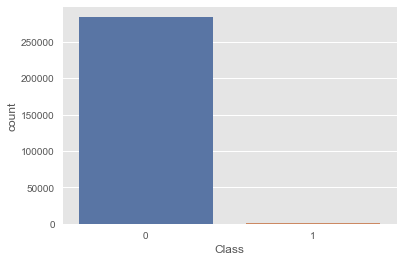

In [72]:
sns.countplot(x="Class",data=df,palette="deep")

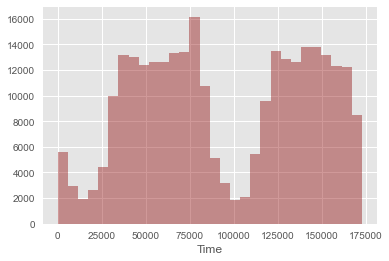

In [73]:
sns.distplot(df["Time"].dropna(),kde=False,color="darkred",bins=30);

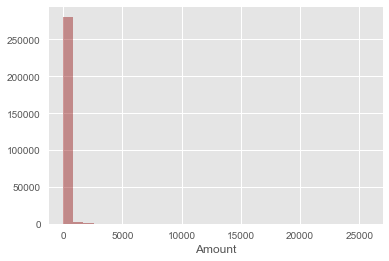

In [74]:
sns.distplot(df["Amount"].dropna(),kde=False,color="darkred",bins=30);

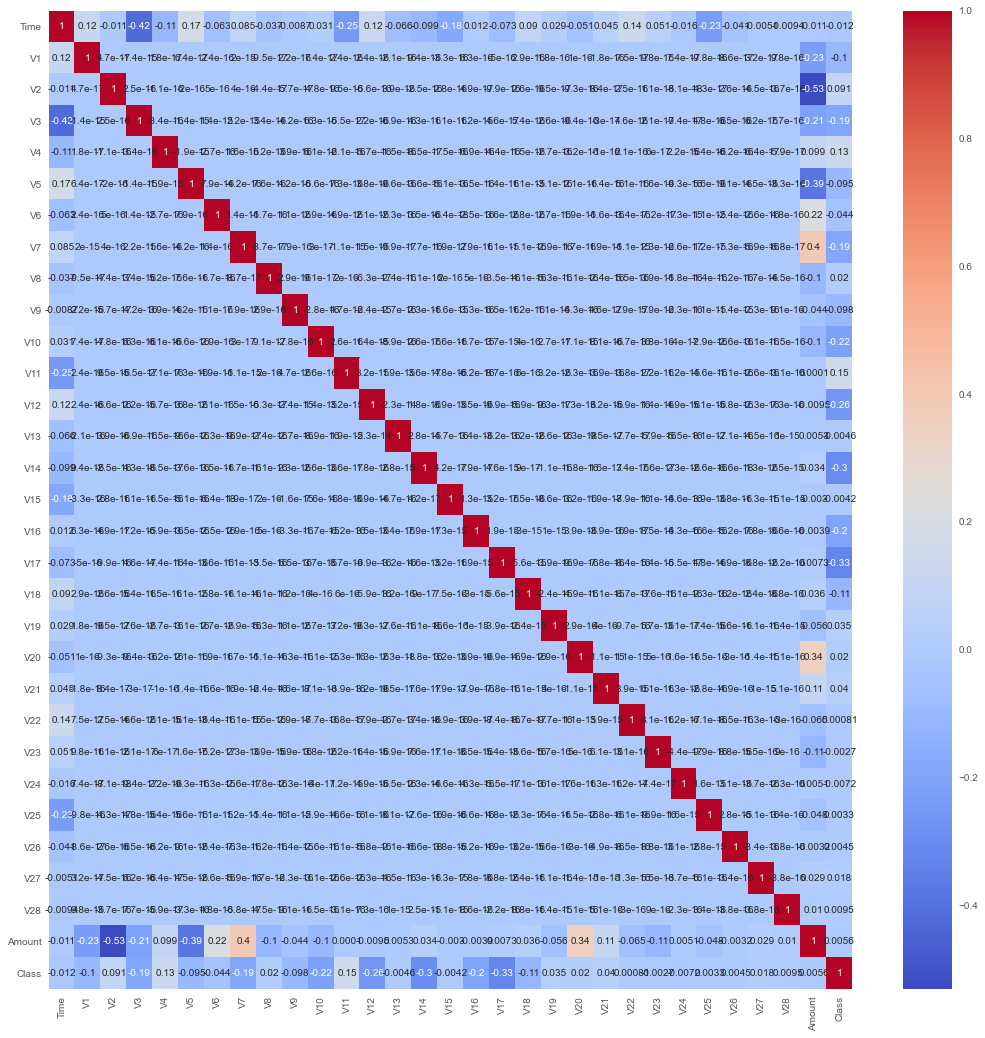

In [75]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm");

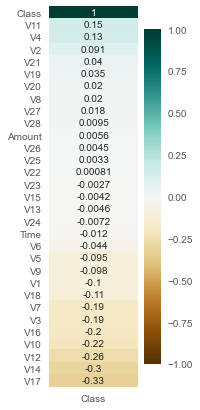

In [76]:
plt.figure(figsize=(2, 7))
sns.heatmap(df.corr()[['Class']].sort_values(by='Class', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG');

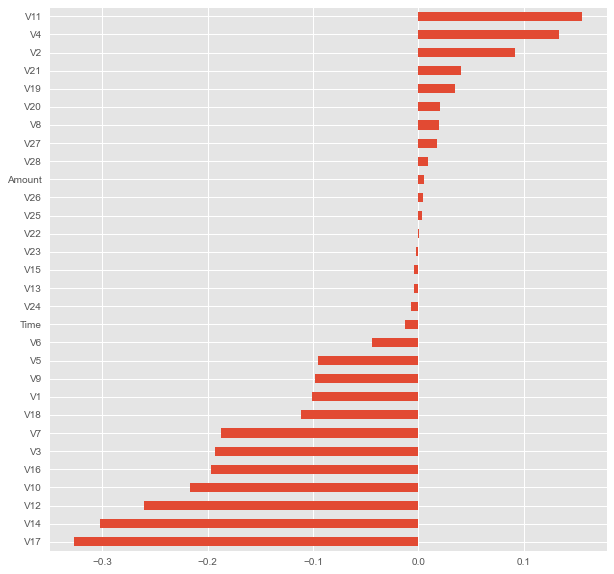

In [77]:
plt.figure(figsize=(10,10))
df.corr()["Class"].sort_values()[:-1].plot.barh();

### Data Cleaning
Check Missing Values and Outliers

In [78]:
df.isnull().sum().any()

False

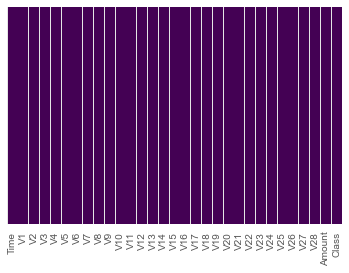

In [79]:
# Visual Representation of Missing Value Check
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis");

_No missing values_

<AxesSubplot:>

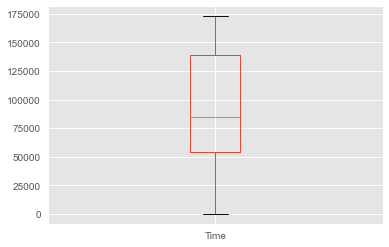

In [80]:
df.Time.plot.box()

<AxesSubplot:>

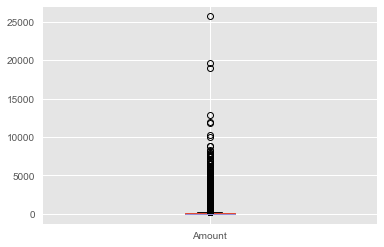

In [81]:
df.Amount.plot.box()

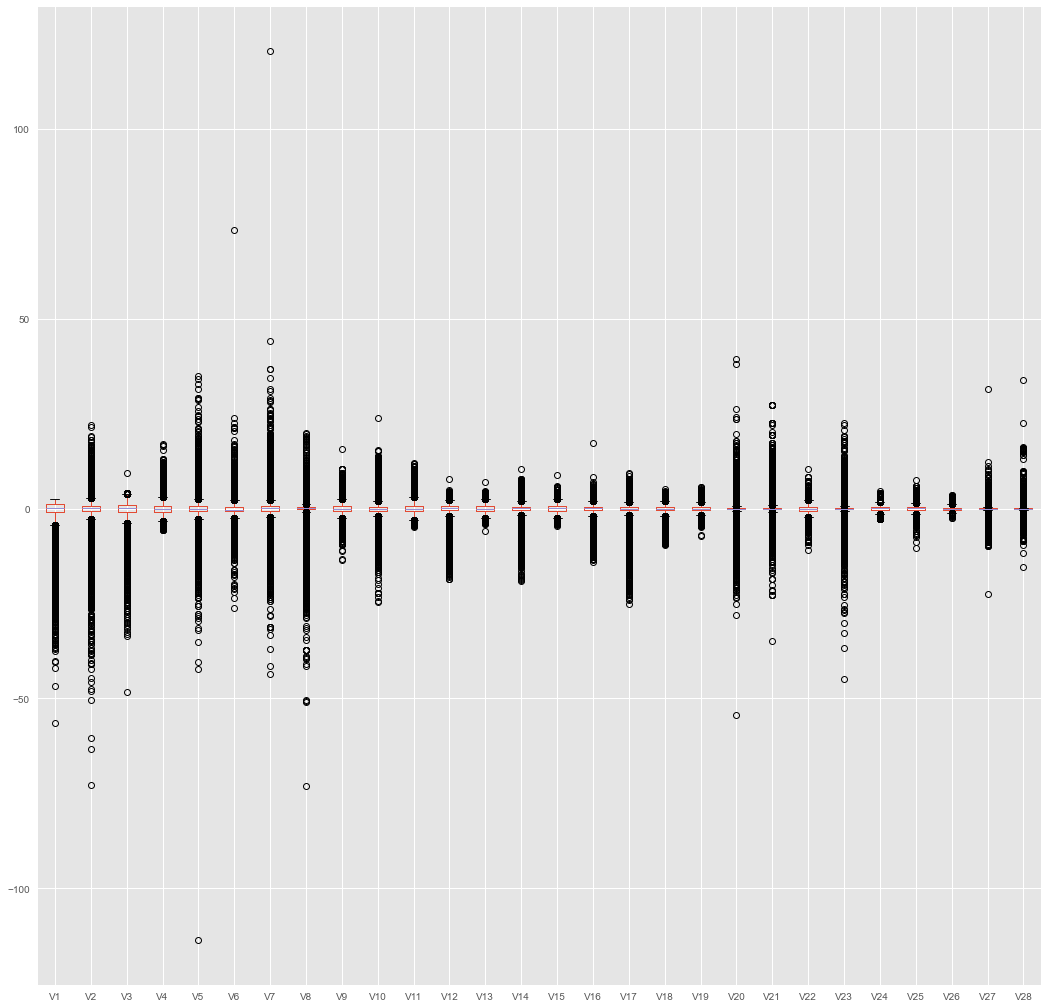

In [82]:
df.drop(['Time','Amount','Class'], axis=1).plot.box(figsize=(18,18));

_Dataset contains huge amount of outliers_

In [83]:
def col_plot(df,col_name,iqr=1.5):
    plt.figure(figsize=(18,5))
    
    plt.subplot(141) # 1 row x 4 column ax first plot
    plt.hist(df[col_name], bins = 20)
    f=lambda x:(np.sqrt(x) if x>=0 else -np.sqrt(-x))
    
    # in 3 sigma ( %99.7 of data) between two lines
    plt.axvline(x=df[col_name].mean() + 3*df[col_name].std(),color='blue')
    plt.axvline(x=df[col_name].mean() - 3*df[col_name].std(),color='blue')
    plt.xlabel(col_name)
    plt.tight_layout
    plt.xlabel("Histogram ±3z")
    plt.ylabel(col_name)

    plt.subplot(142)
    plt.boxplot(df[col_name], whis = iqr)
    plt.xlabel(f"IQR={iqr}")

    plt.subplot(143)
    plt.boxplot(df[col_name].apply(f), whis = iqr)
    plt.xlabel(f"ROOT SQUARE - IQR={iqr}")

    plt.subplot(144)
    
    plt.boxplot(np.log(df[col_name]-min(df[col_name])+1), whis = iqr)
    plt.xlabel(f"LOGARITMIC - IQR={iqr}")
    plt.show()

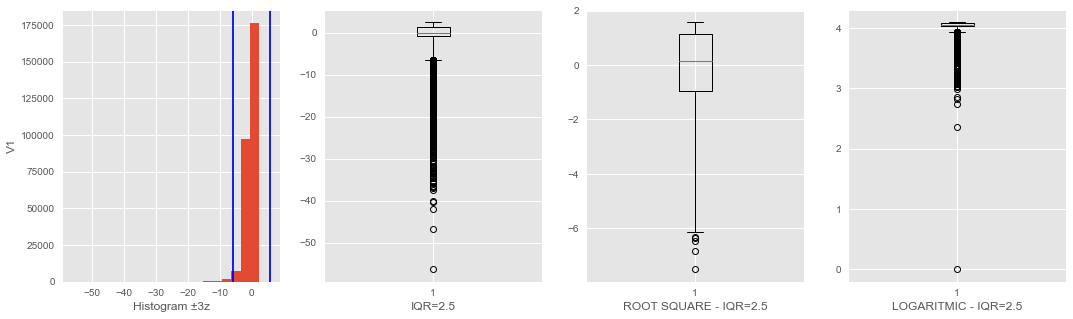

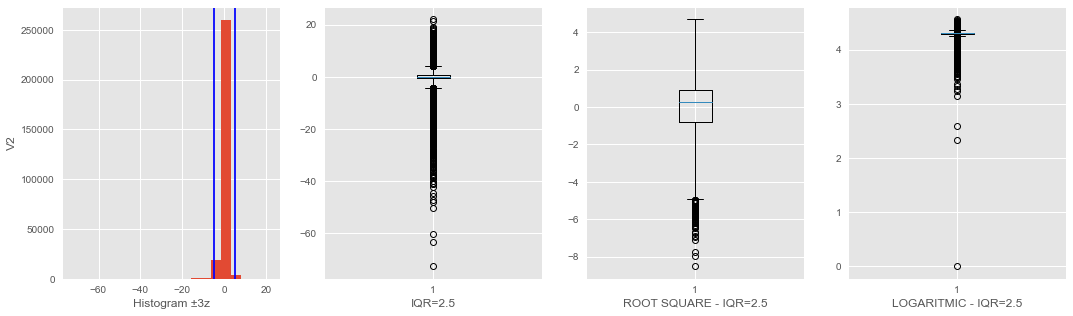

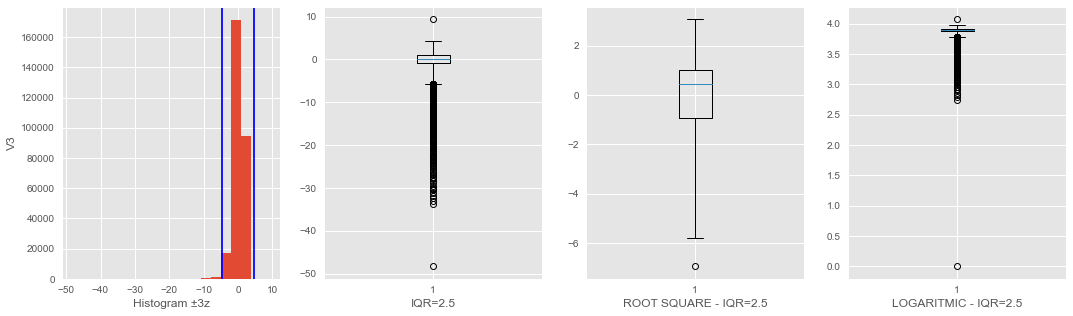

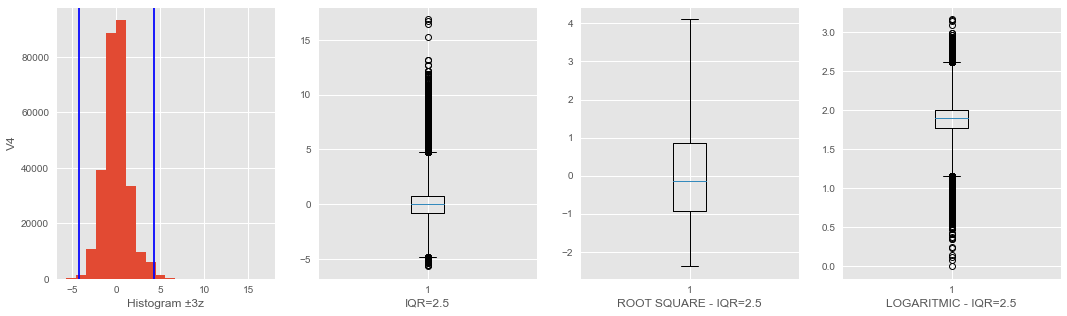

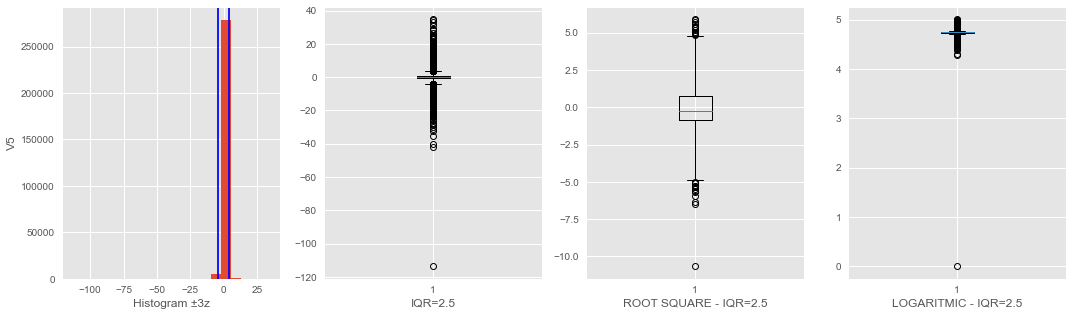

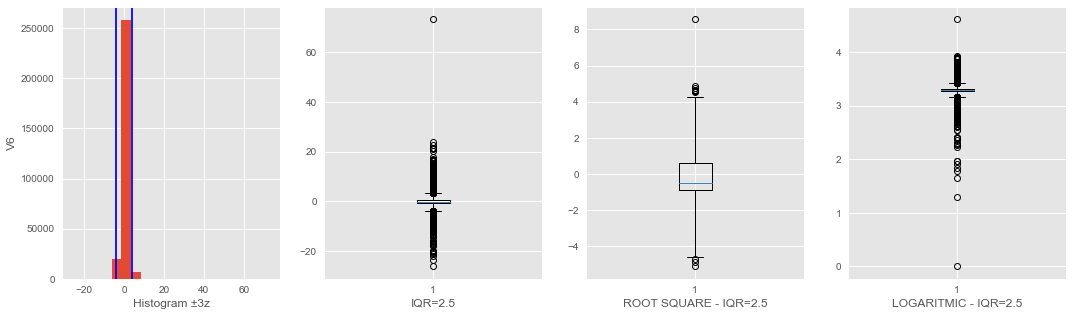

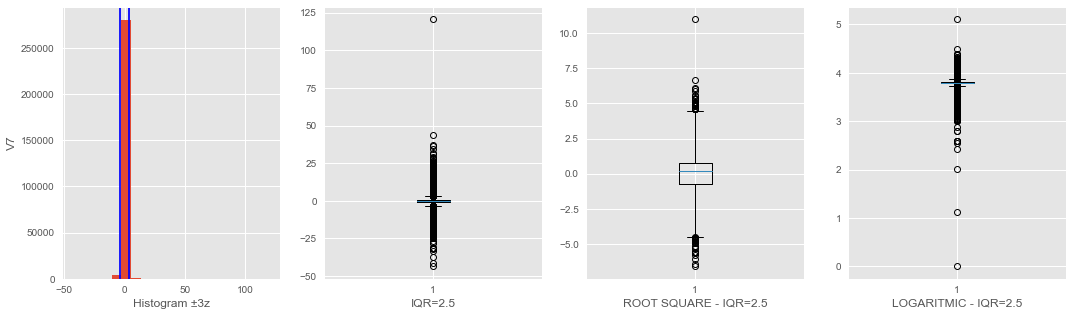

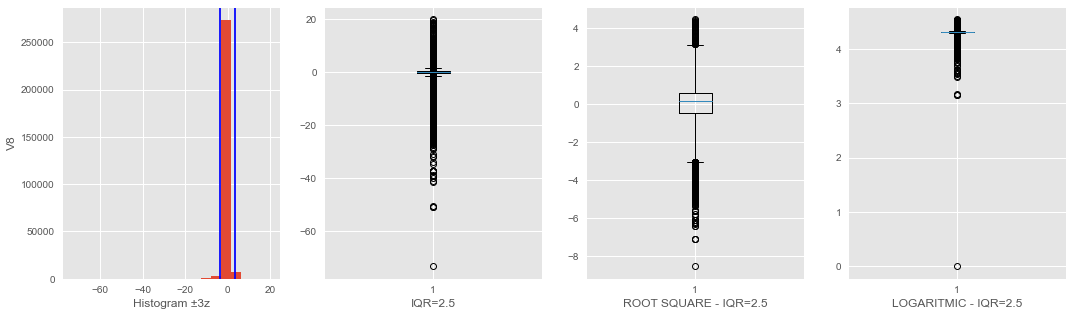

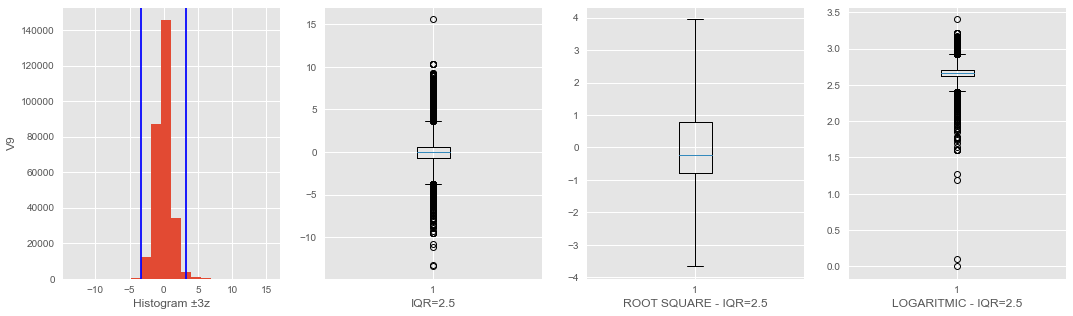

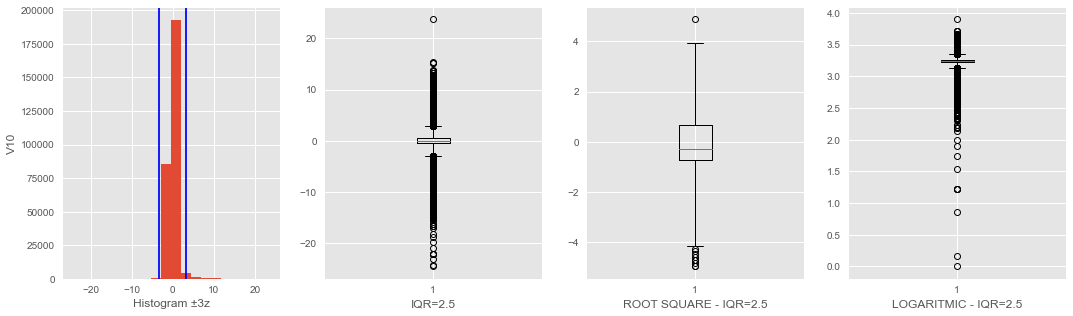

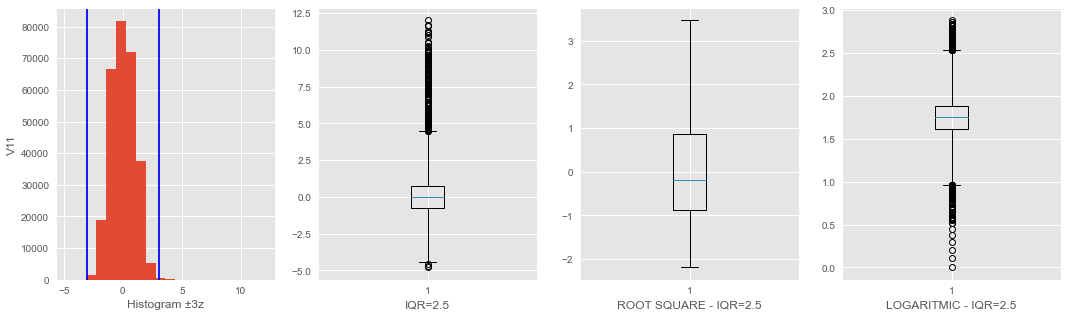

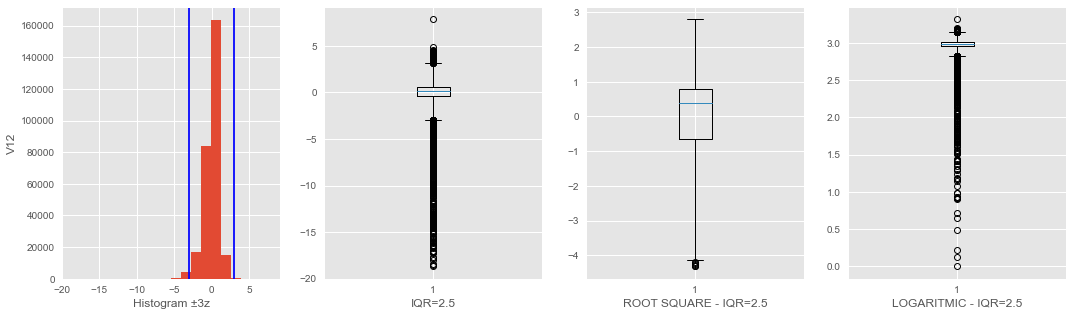

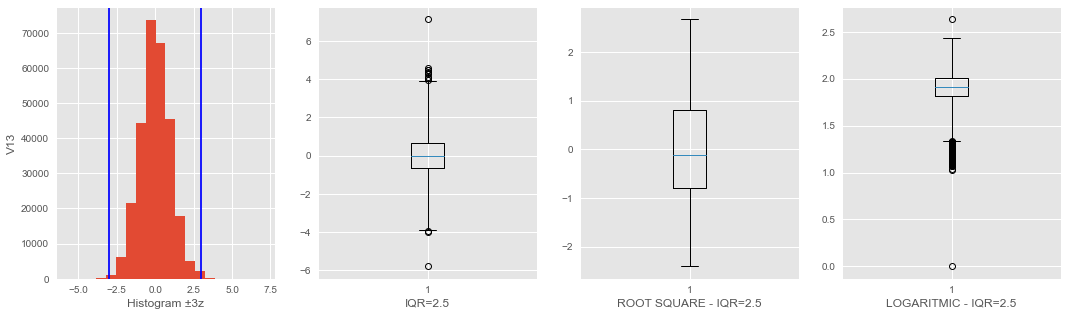

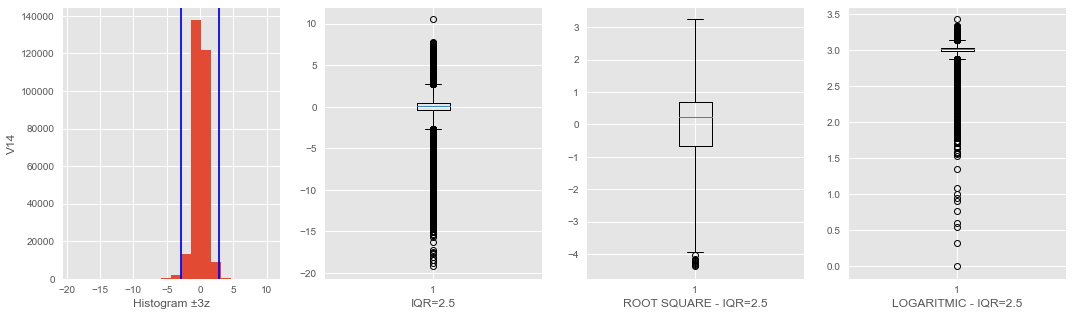

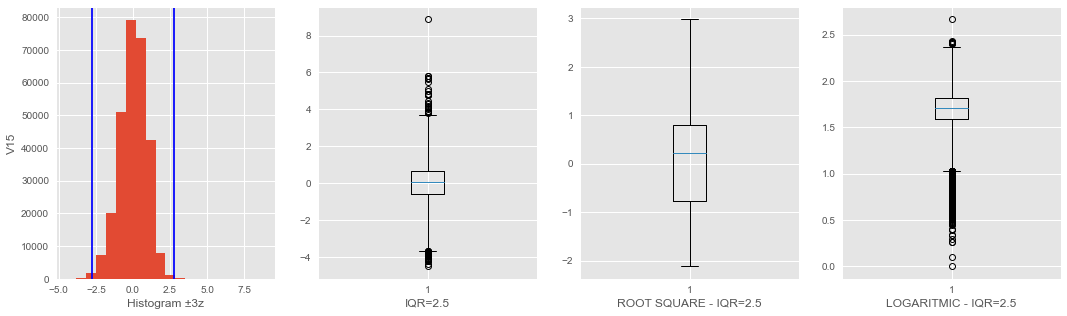

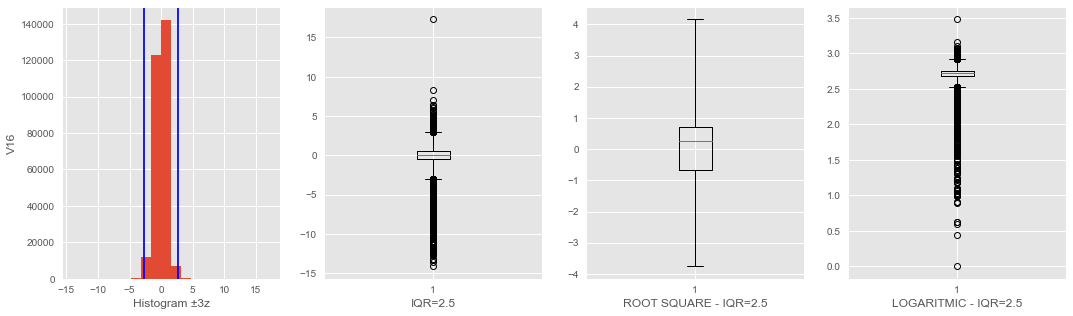

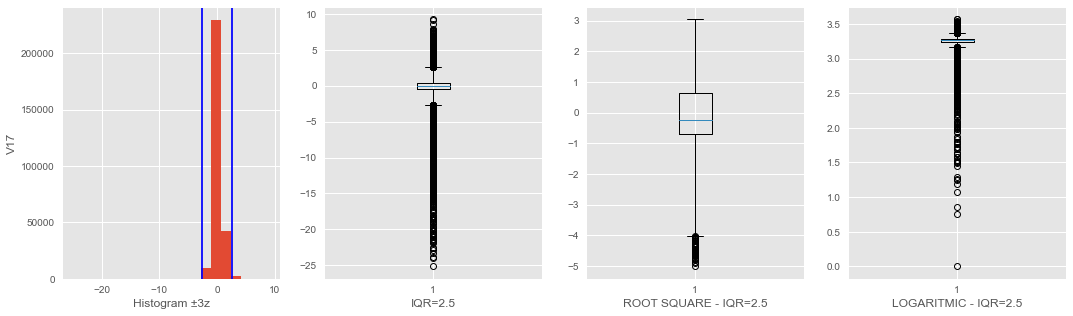

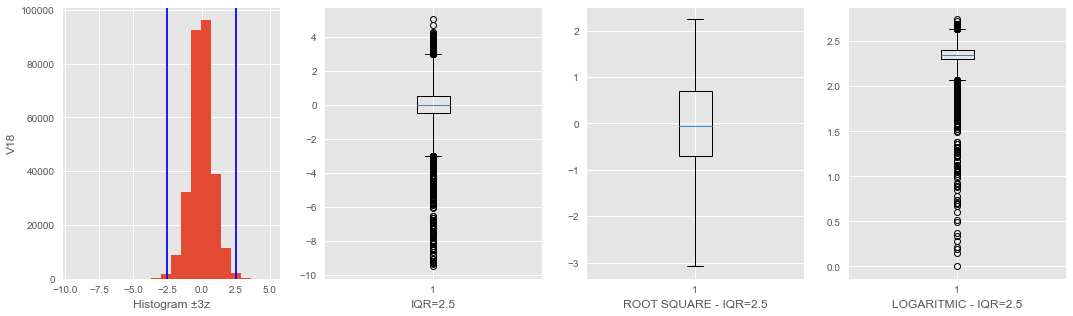

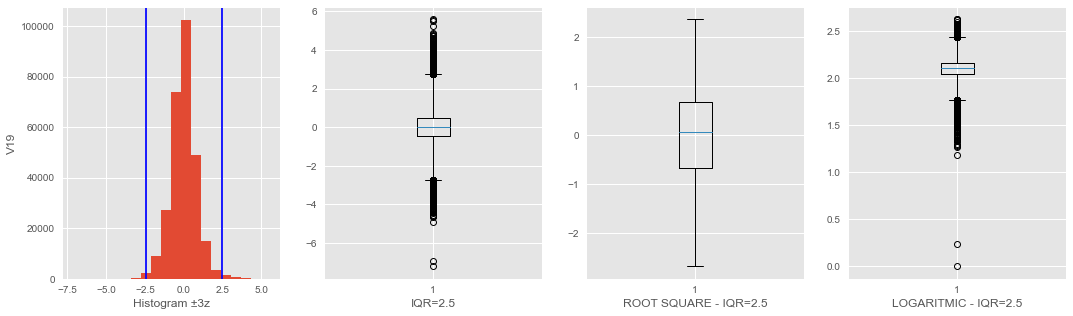

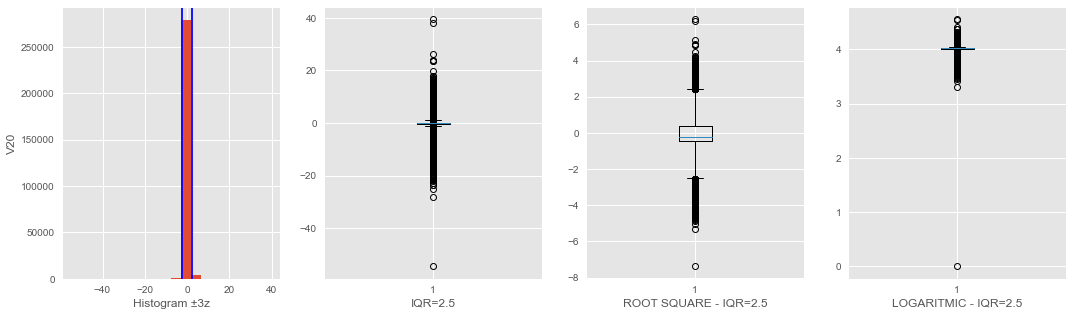

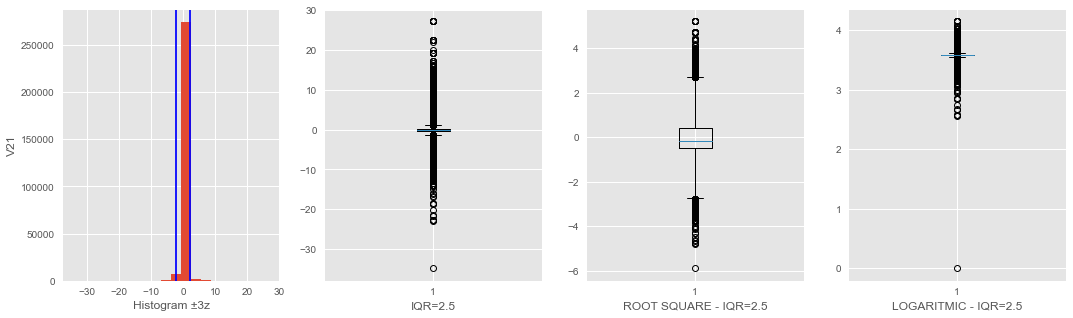

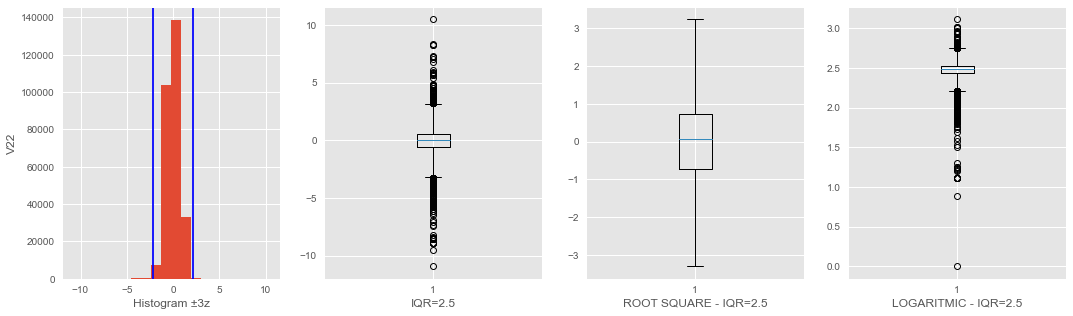

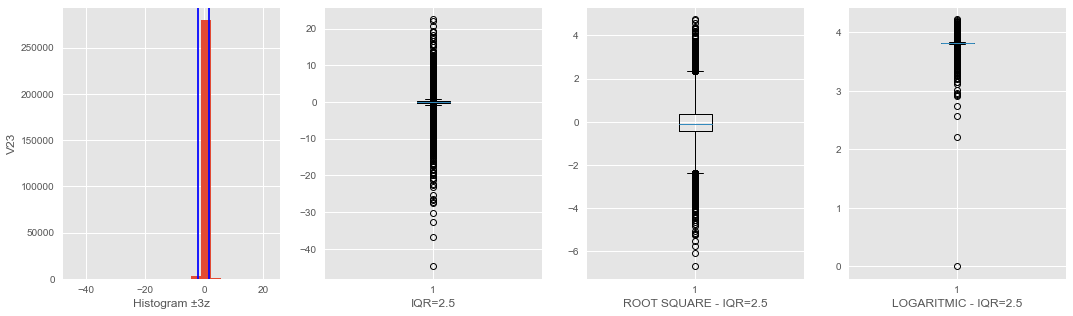

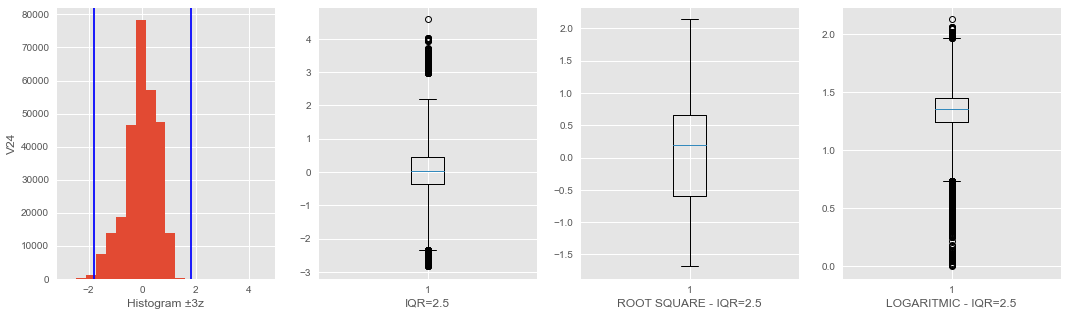

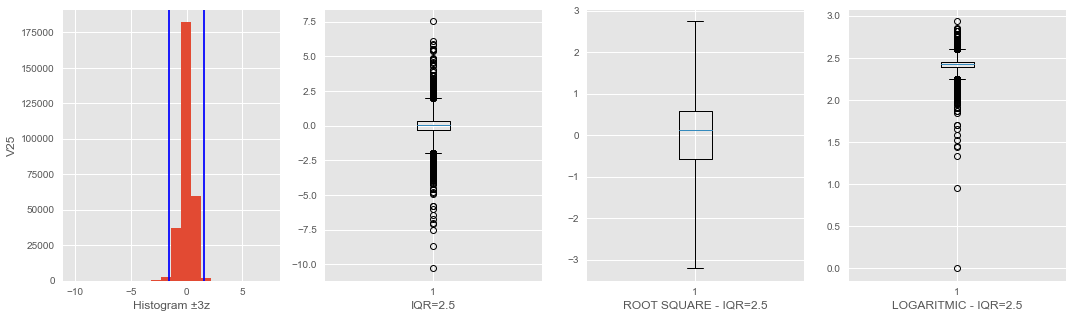

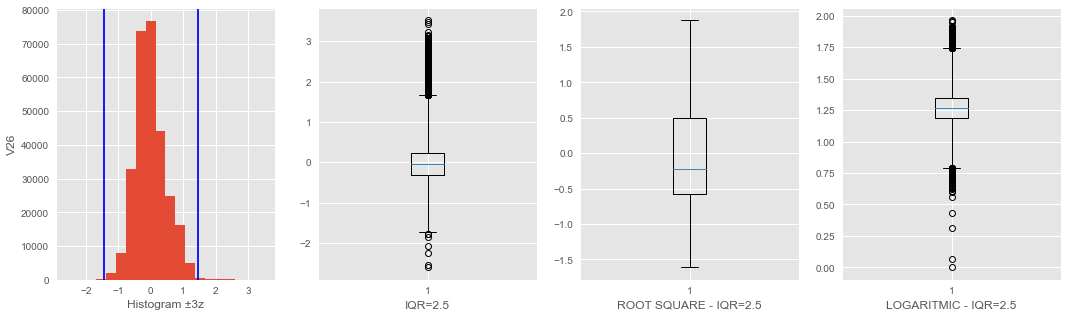

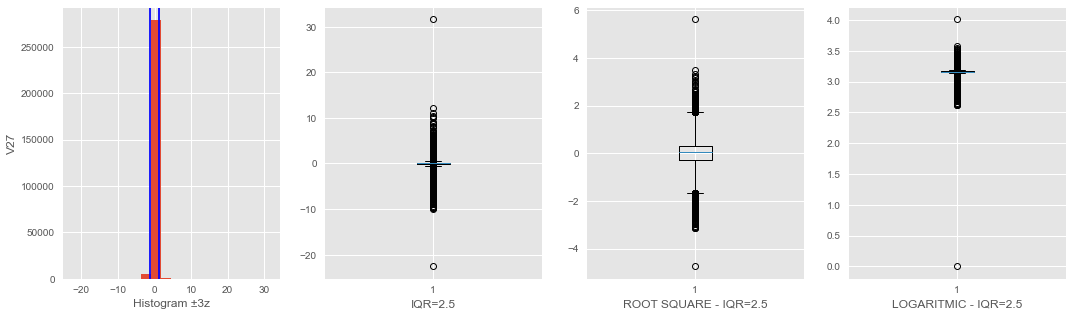

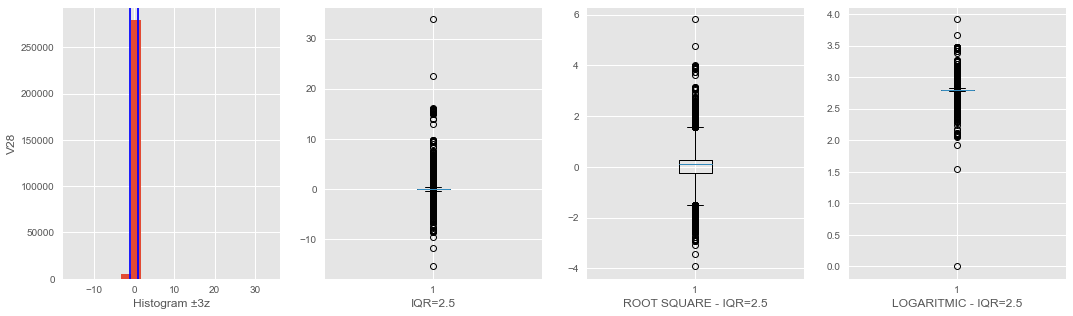

In [84]:
df_eda=df.drop(['Time','Amount','Class'], axis=1)

for i in df_eda:
    col_plot(df_eda,i,2.5)

In [85]:
from scipy.stats.mstats import winsorize

def plot_winsorize(df,col_name,up=0.05,down=0.05):
    plt.figure(figsize = (18, 6))

    winsor=winsorize(df[col_name], (down,up))
    logr=np.log(df[col_name]-min(df[col_name])+1)

    plt.subplot(141)
    plt.hist(winsor, bins = 20)
    plt.axvline(x=winsor.mean()+3*winsor.std(),color='red')
    plt.axvline(x=winsor.mean()-3*winsor.std(),color='red')
    plt.xlabel('Winsorize_Histogram')
    plt.ylabel(col_name)
    plt.tight_layout

    plt.subplot(142)
    plt.boxplot(winsor, whis = 1.5)
    plt.xlabel('Winsorize - IQR:1.5')
    
    plt.subplot(143)
    plt.hist(logr, bins=25)
    plt.axvline(x=logr.mean()+3*logr.std(),color='red')
    plt.axvline(x=logr.mean()-3*logr.std(),color='red')
    plt.xlabel('Logr_col_name')

    plt.subplot(144)
    plt.boxplot(logr, whis = 1.5)
    plt.xlabel("Logaritmic - IQR=1.5")
    plt.show() 

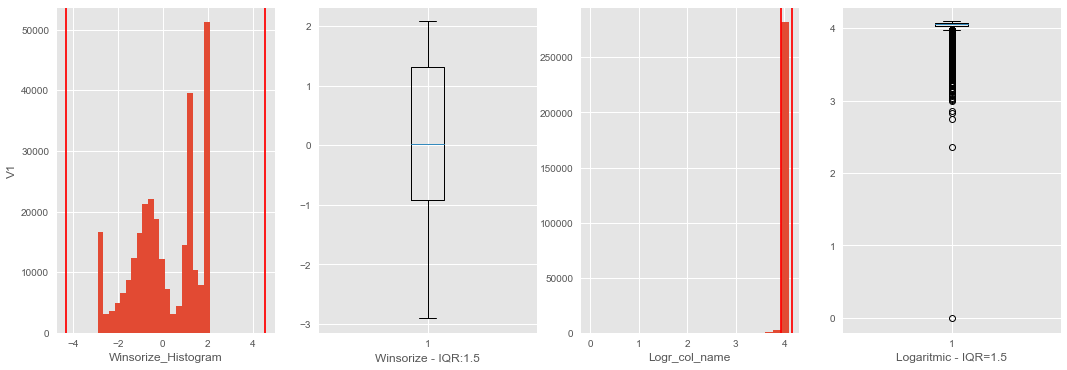

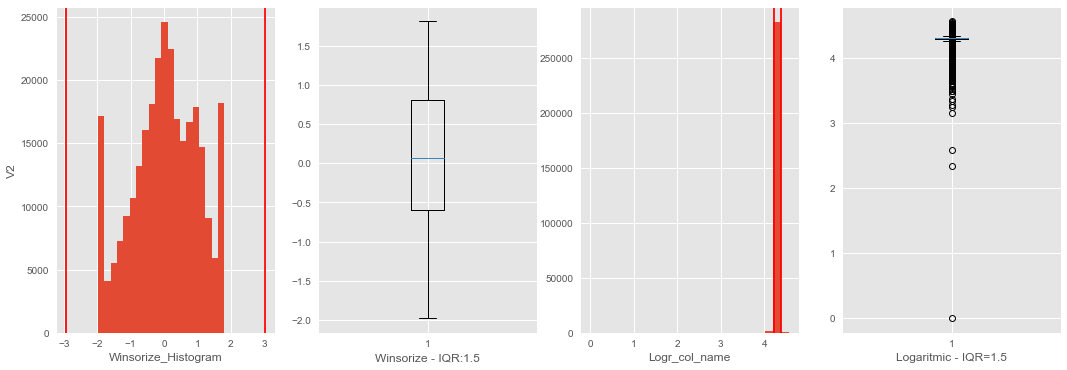

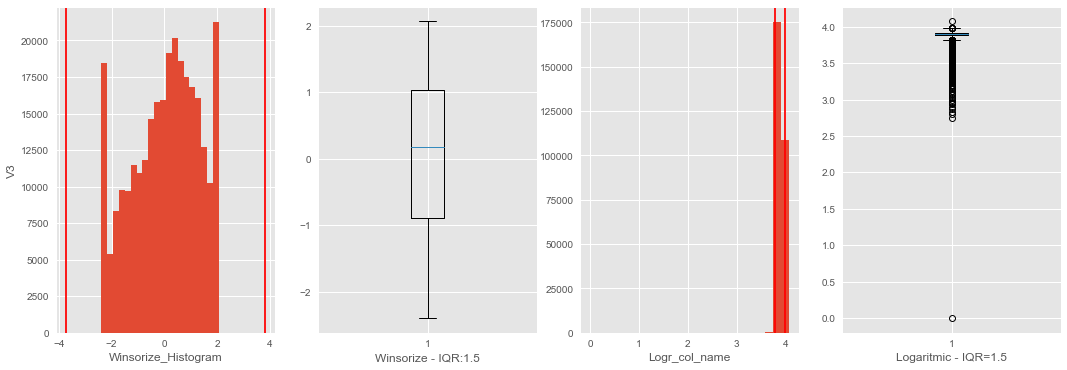

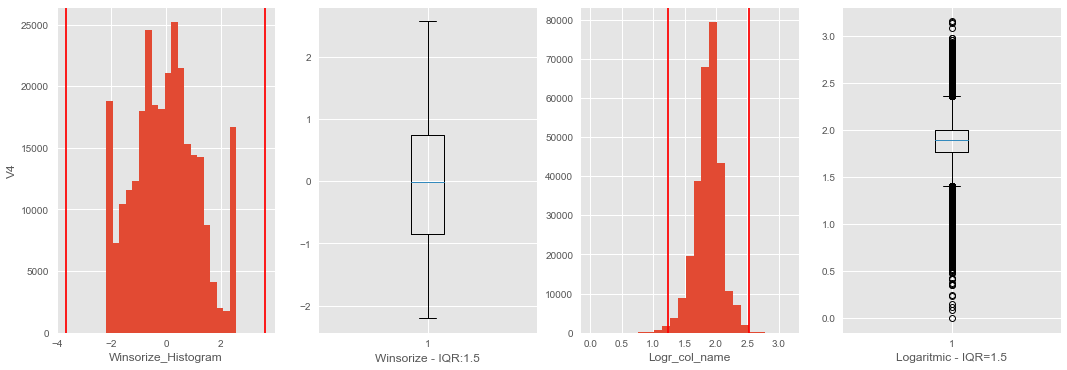

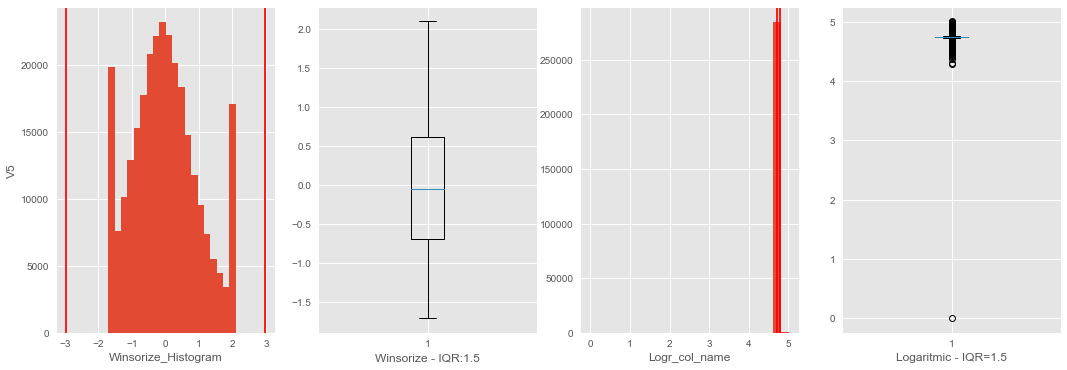

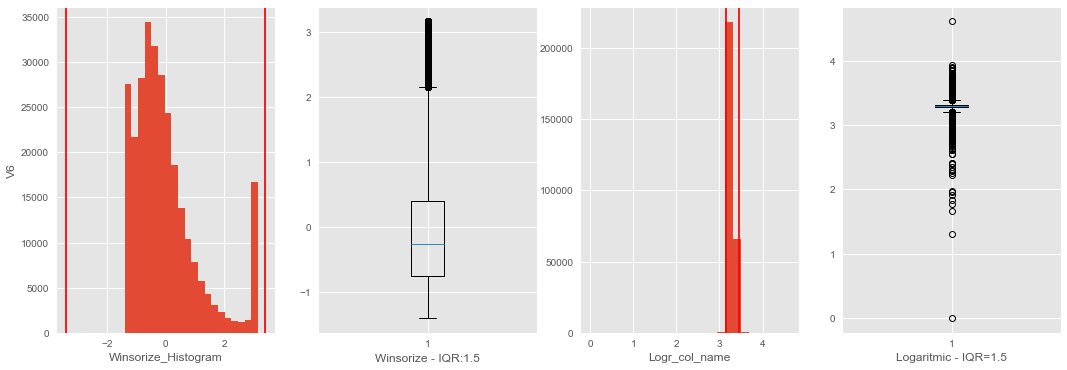

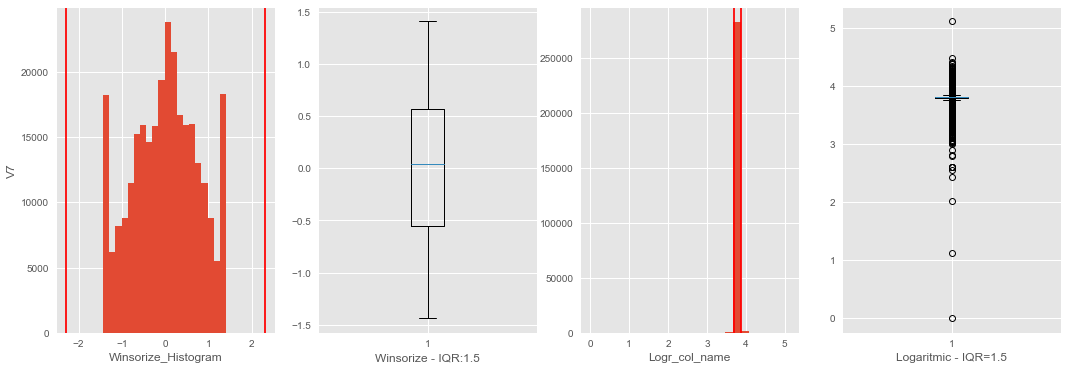

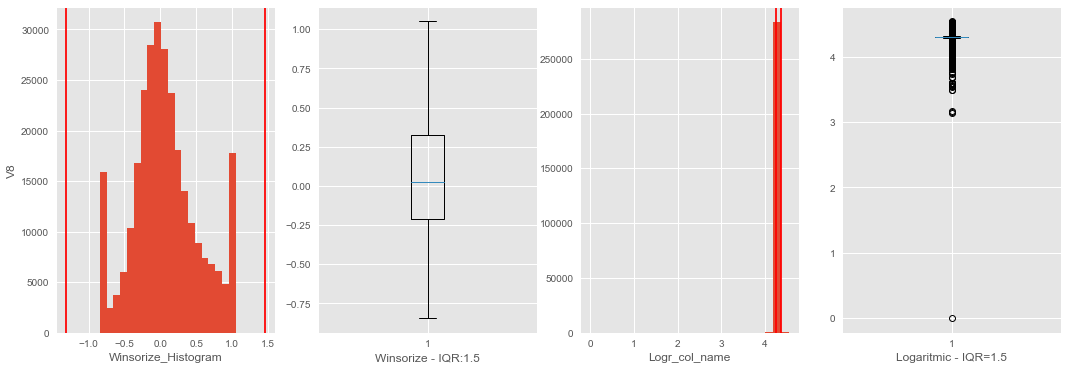

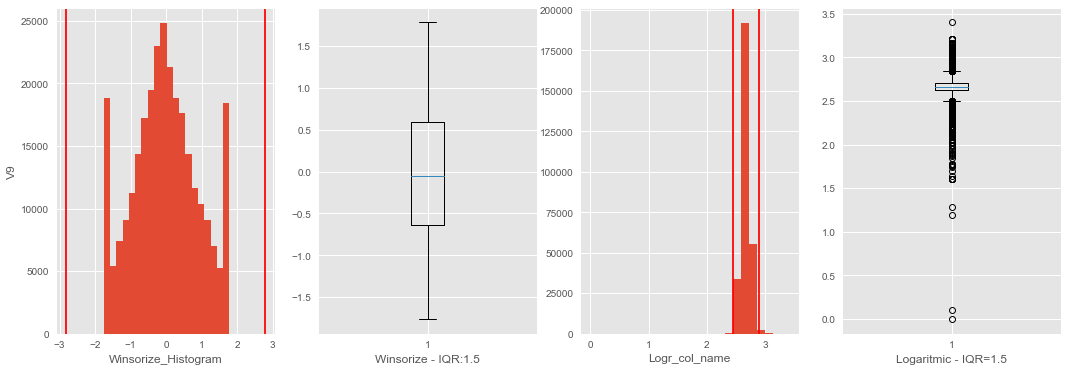

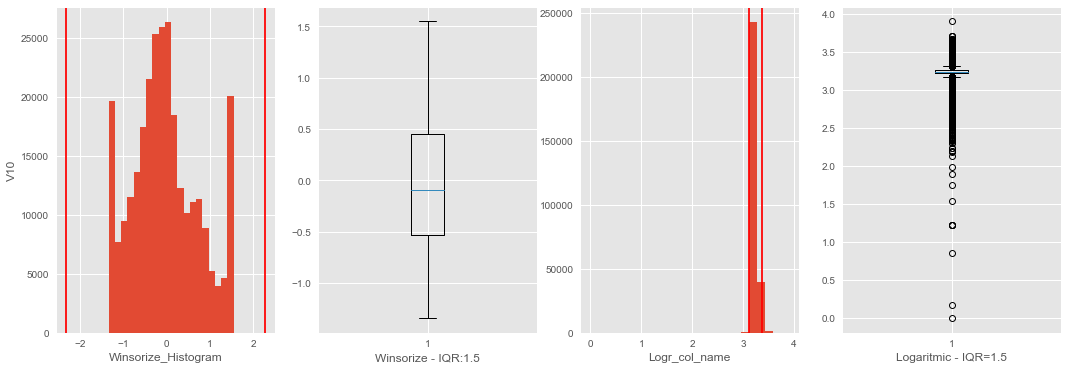

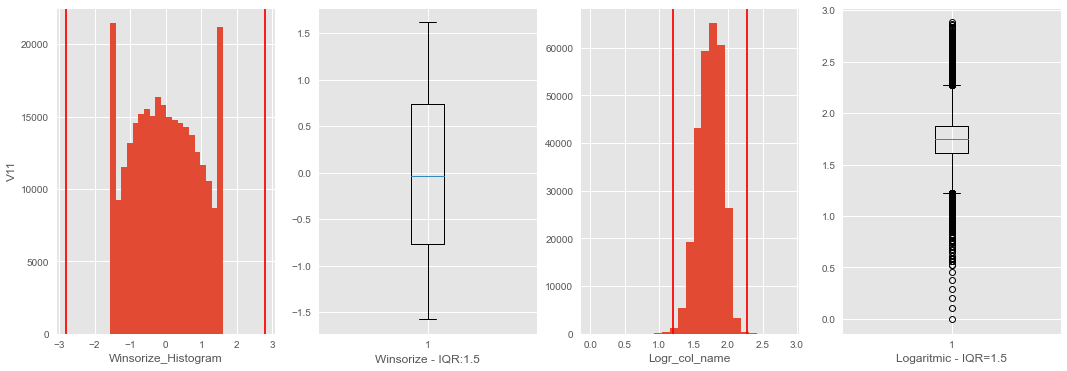

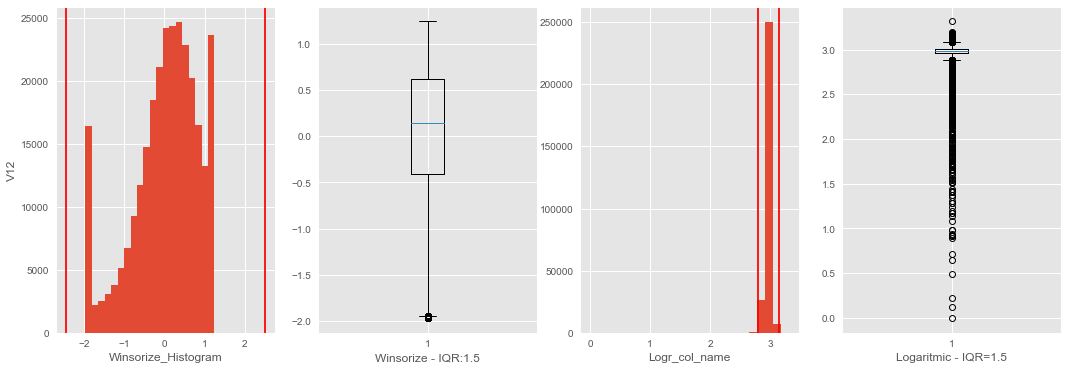

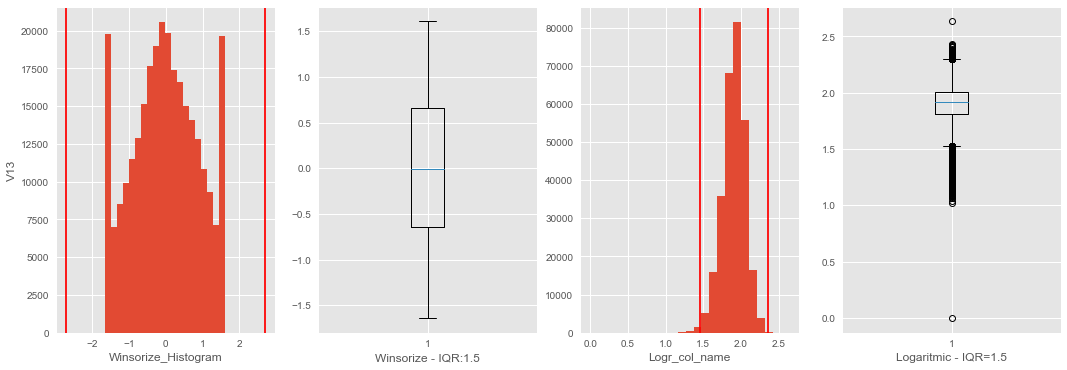

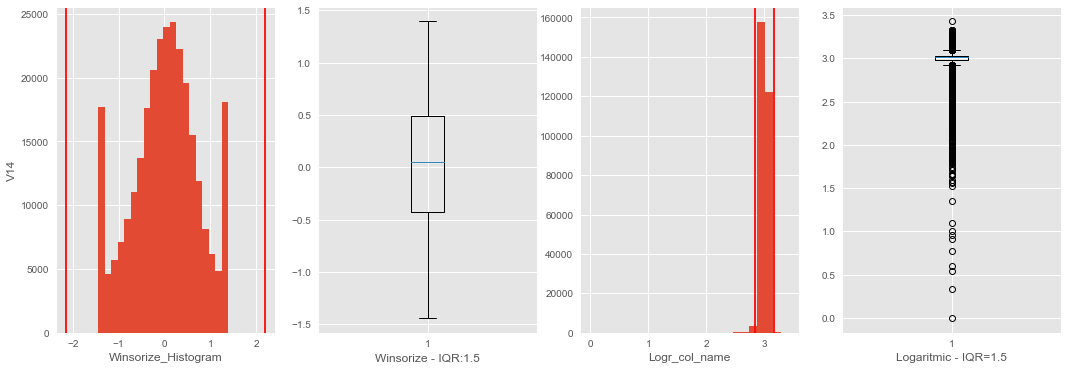

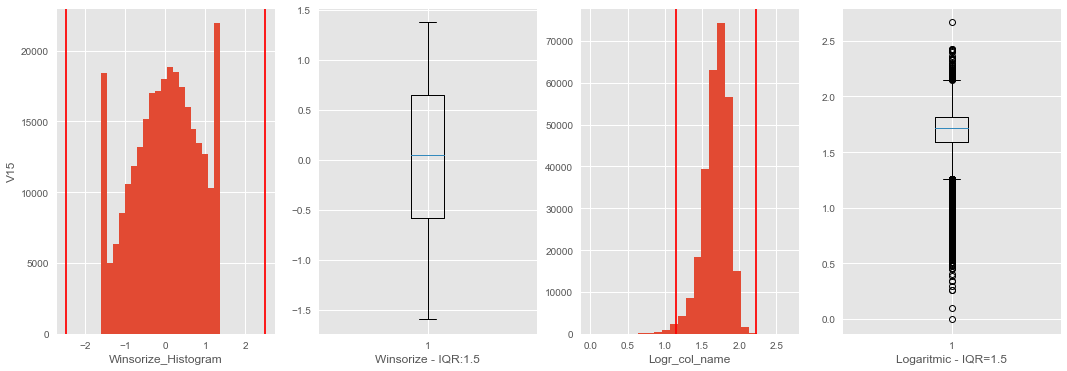

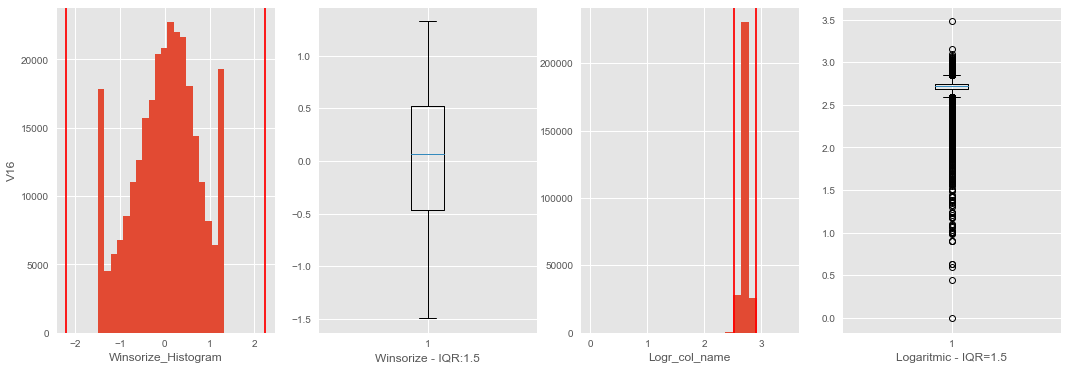

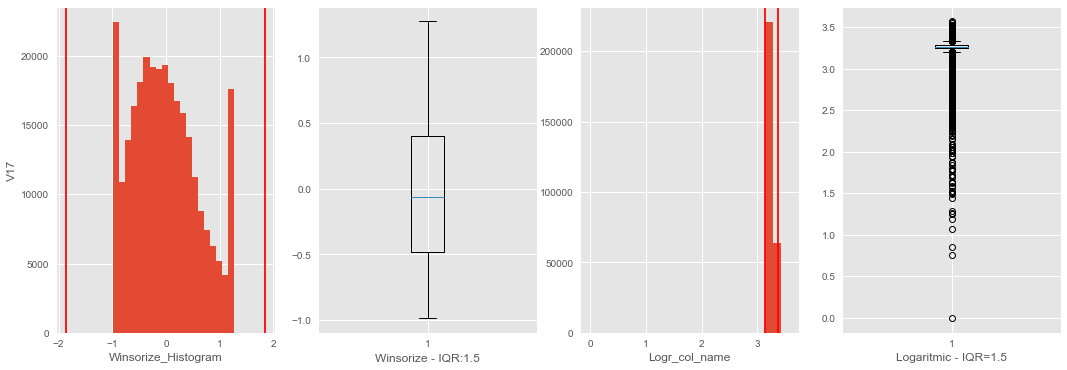

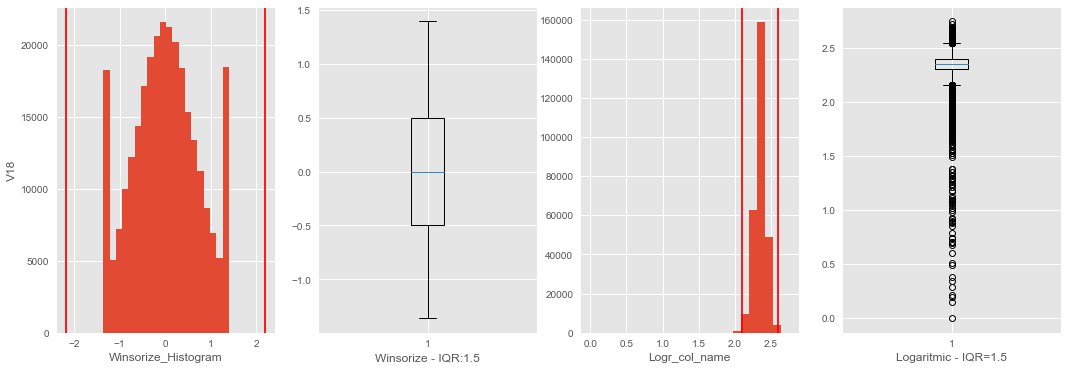

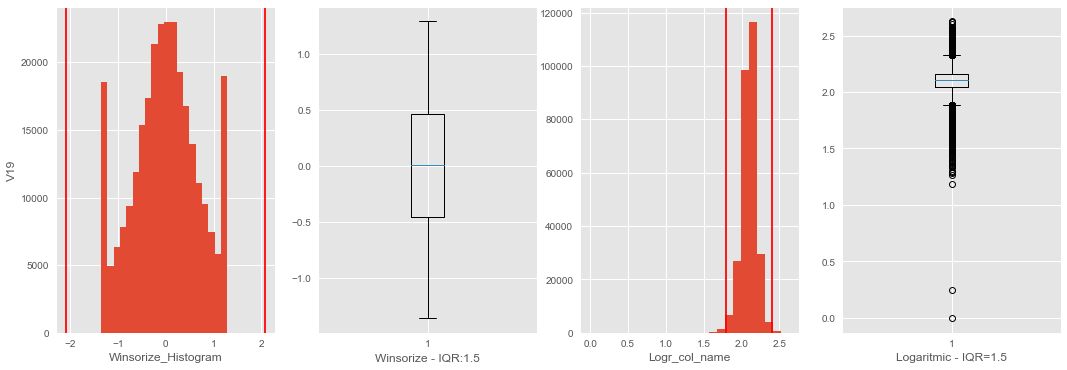

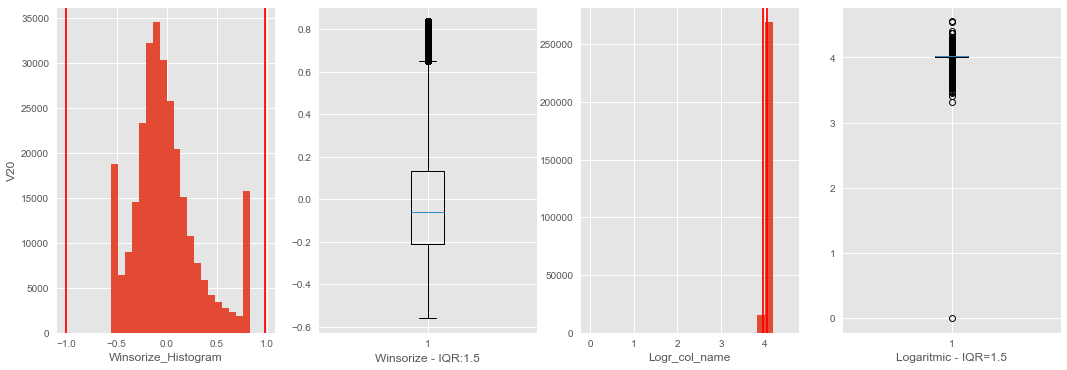

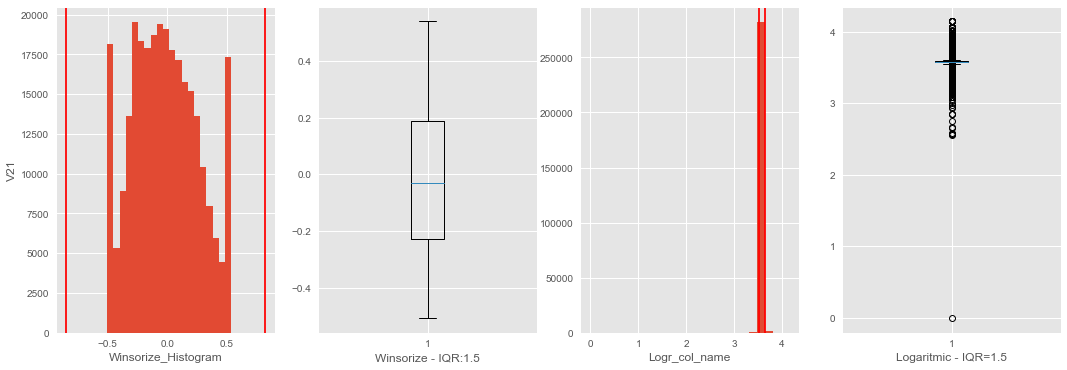

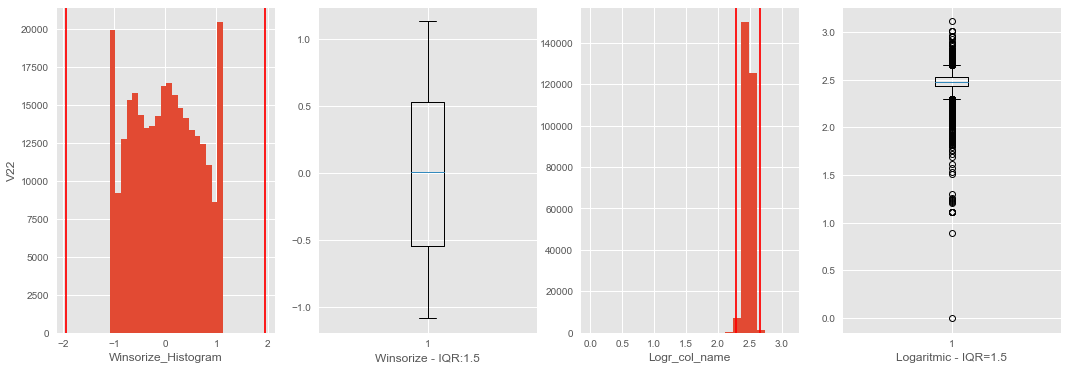

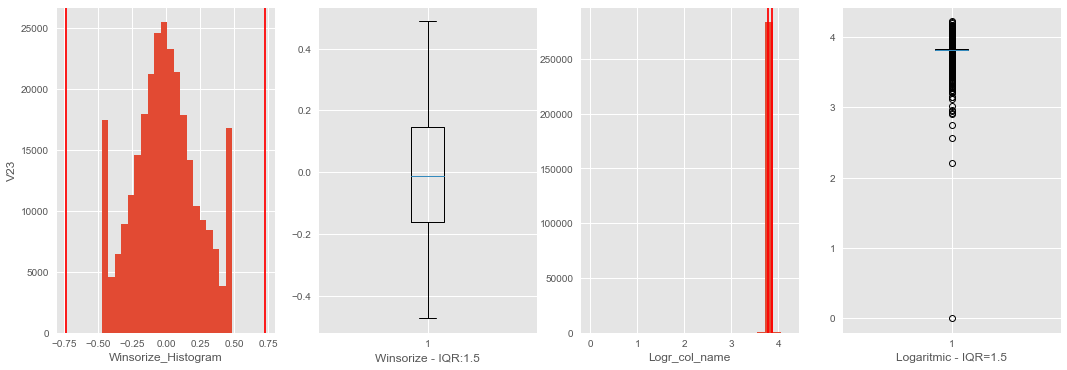

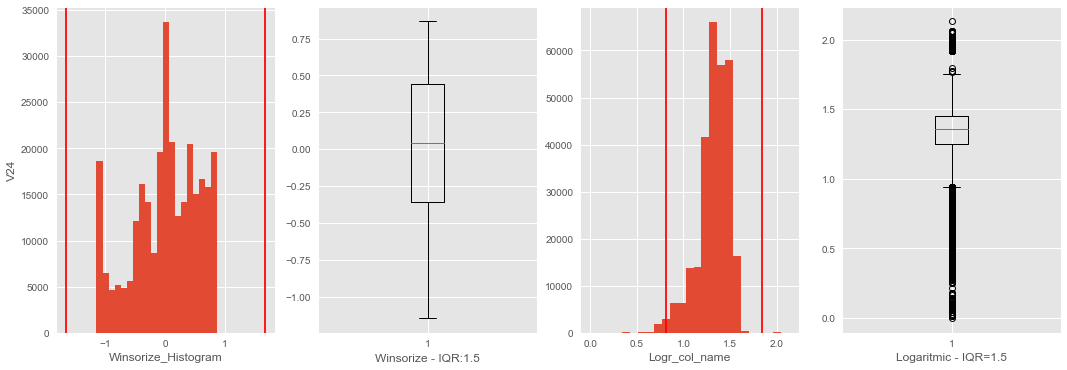

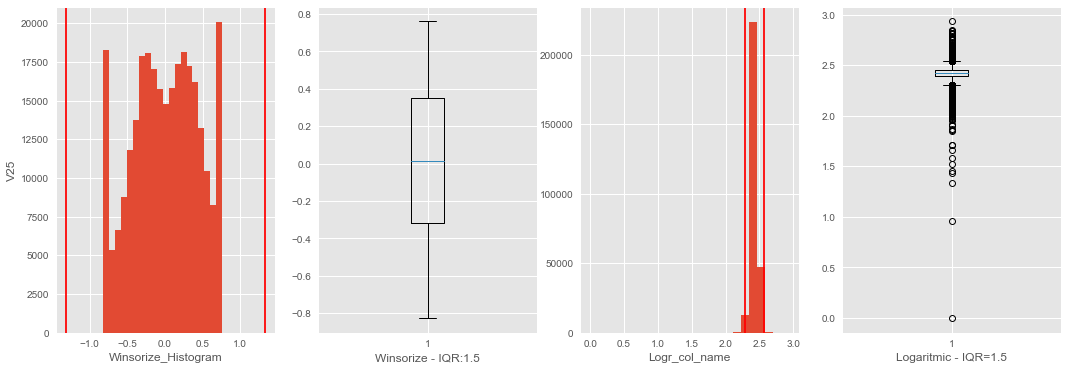

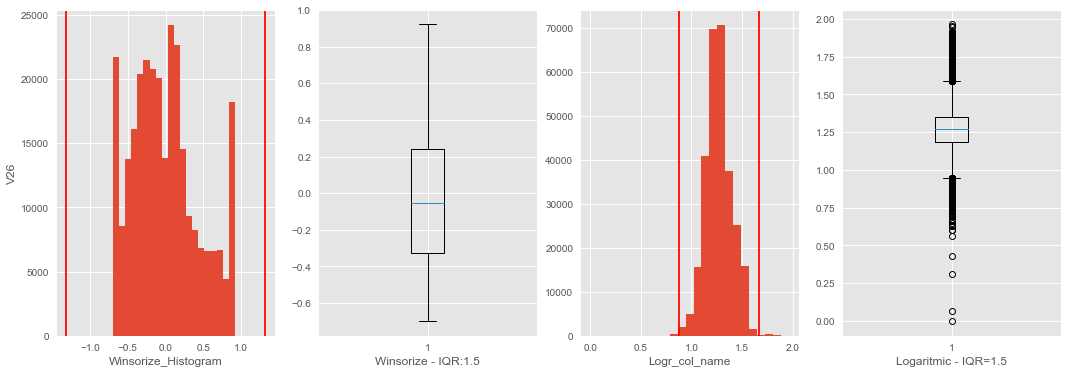

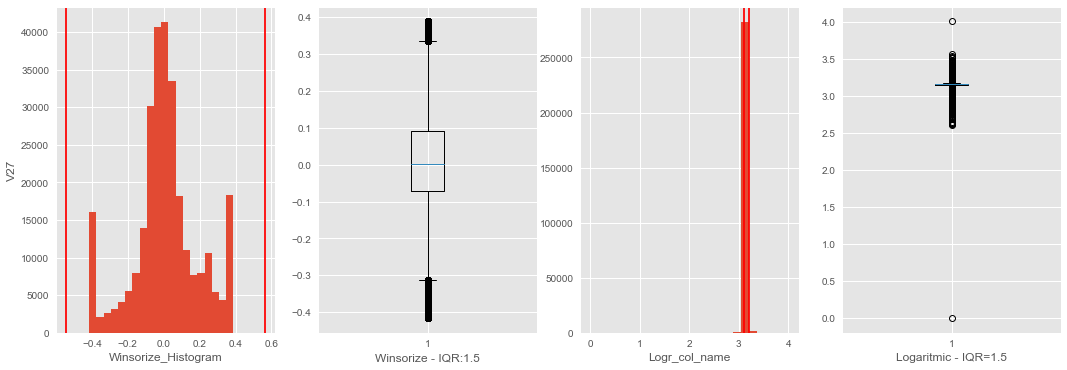

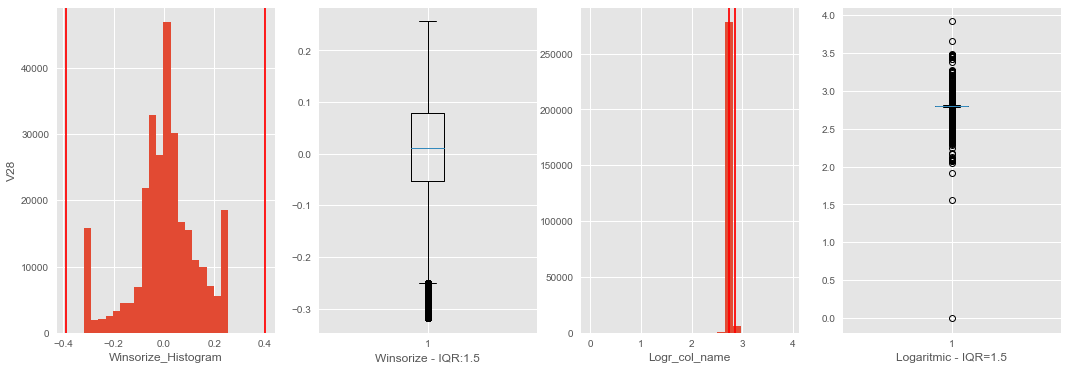

In [86]:
for i in df_eda:
    plot_winsorize(df_eda,i)

In [87]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [88]:
features=[
#         'Time', 'Amount', 'Class'
'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
         ]

In [89]:
df_winsorised=df.copy()
for i in features:
    df_winsorised[i]=winsorize(df_winsorised[i], (0.05,0.05))

In [90]:
from scipy.stats import zscore
from scipy import stats

def outlier_inspect(df, col, min_z=1, max_z = 5, step = 0.5, max_hist = None, bins = 50):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1,3,1)
    if max_hist == None:
        sns.distplot(df[col], kde=False, bins = 50)
    else :
        sns.distplot(df[df[col]<=max_hist][col], kde=False, bins = 50)
   
    plt.subplot(1,3,2)
    sns.boxplot(df[col])
    plt.subplot(1,3,3)
    z_score_inspect = outlier_zscore(df, col, min_z=min_z, max_z = max_z, step = step)
    
    plt.subplot(1,3,1)
    plt.axvline(x=df[col].mean() + z_score_inspect[2]*df[col].std(),color='red',linewidth=1,linestyle ="--")
    plt.axvline(x=df[col].mean() - z_score_inspect[2]*df[col].std(),color='red',linewidth=1,linestyle ="--")
    plt.show()
    
    return z_score_inspect

In [91]:
def detect_outliers(df:pd.DataFrame, col_name:str, p=1.5) ->int:
    ''' 
    this function detects outliers based on 3 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(p*IQR)
    lower_limit = first_quartile-(p*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [92]:
k=1.5
print(f"Number of Outliers for {k}*IQR\n")


total=0
for col in features:
    if detect_outliers(df_eda, col)[2] > 0:
        outliers=detect_outliers(df_eda, col, k)[2]
        total+=outliers
        print("{} outliers in '{}'".format(outliers,col))
print("\n{} OUTLIERS TOTALLY".format(total))

Number of Outliers for 1.5*IQR

7062 outliers in 'V1'
13526 outliers in 'V2'
3363 outliers in 'V3'
11148 outliers in 'V4'
12295 outliers in 'V5'
22965 outliers in 'V6'
8948 outliers in 'V7'
24134 outliers in 'V8'
8283 outliers in 'V9'
9496 outliers in 'V10'
780 outliers in 'V11'
15348 outliers in 'V12'
3368 outliers in 'V13'
14149 outliers in 'V14'
2894 outliers in 'V15'
8184 outliers in 'V16'
7420 outliers in 'V17'
7533 outliers in 'V18'
10205 outliers in 'V19'
27770 outliers in 'V20'
14497 outliers in 'V21'
1317 outliers in 'V22'
18541 outliers in 'V23'
4774 outliers in 'V24'
5367 outliers in 'V25'
5596 outliers in 'V26'
39163 outliers in 'V27'
30342 outliers in 'V28'

338468 OUTLIERS TOTALLY


In [93]:
k=1.5
print(f"Number of Outliers for {k}*IQR\n")


total=0
for col in features:
    if detect_outliers(df_winsorised, col)[2] > 0:
        outliers=detect_outliers(df_winsorised, col, k)[2]
        total+=outliers
        print("{} outliers in '{}'".format(outliers,col))
print("\n{} OUTLIERS TOTALLY".format(total))

Number of Outliers for 1.5*IQR

21213 outliers in 'V6'
14579 outliers in 'V12'
19087 outliers in 'V20'
39163 outliers in 'V27'
18542 outliers in 'V28'

112584 OUTLIERS TOTALLY


In [94]:
df_winsorised.shape

(284807, 31)

In [95]:
# Not dropping outliers
# iqr=1.5
# for i in features:
#     lower,upper,_=detect_outliers(df_winsorised,i,iqr)
#     df_winsorised=df_winsorised[(df_winsorised[i]>lower)&(df_winsorised[i]<upper)]

In [96]:
# df_winsorised.shape

In [97]:
df_winsorised.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

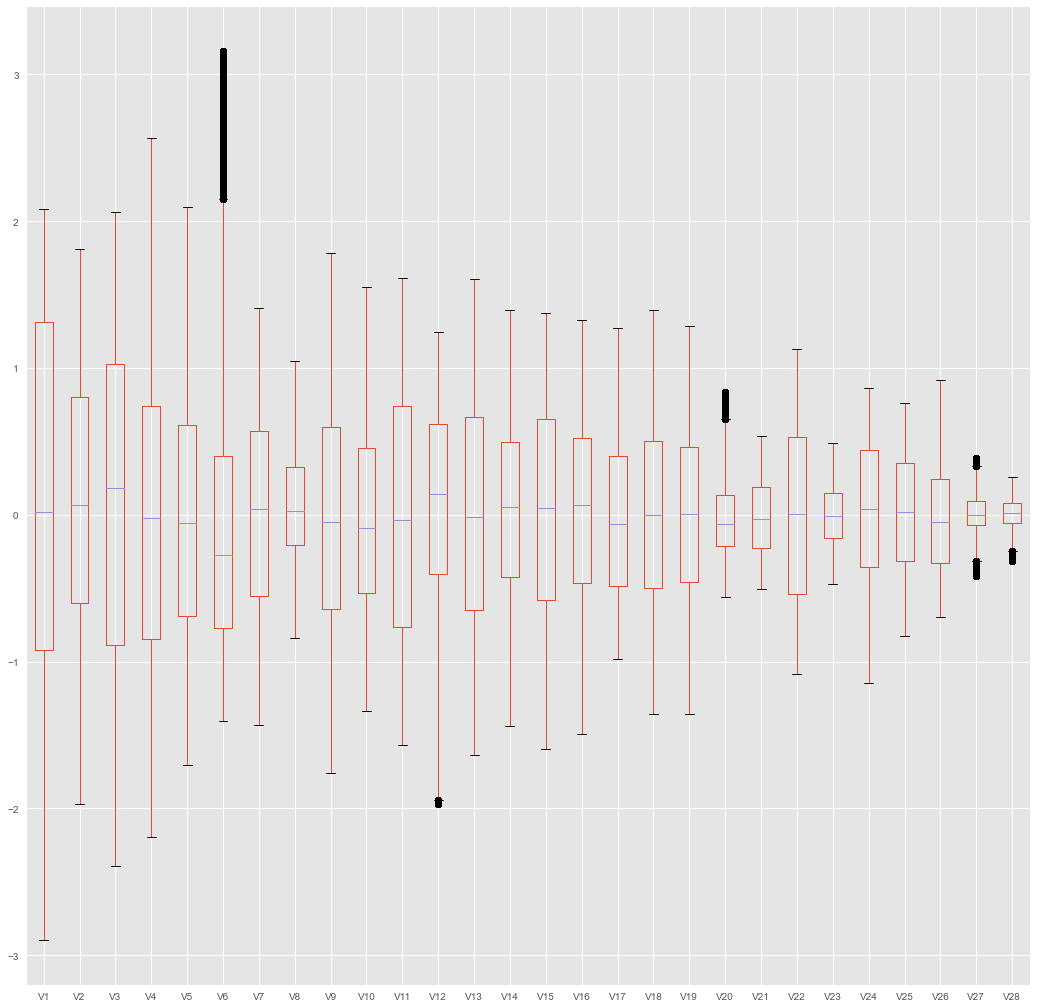

In [98]:
df_winsorised.drop(['Time','Amount','Class'], axis=1).plot.box(figsize=(18,18));

---
---


## 2. Data Preprocessing

#### Train - Test Split

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

In [99]:
df_winsorised.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.06,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.49,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.14,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


In [144]:
X = df_winsorised.drop('Class',axis=1)
y = df_winsorised['Class']

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.3, random_state=42)

#### Scaling

In [103]:
df_winsorised.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.00,94813.86,47488.15,0.00,54201.50,84692.00,139320.50,172792.00
V1,284807.00,0.12,1.47,-2.90,-0.92,0.02,1.32,2.08
V2,284807.00,0.05,0.99,-1.97,-0.60,0.07,0.80,1.81
V3,284807.00,0.04,1.26,-2.39,-0.89,0.18,1.03,2.06
V4,284807.00,-0.02,1.21,-2.20,-0.85,-0.02,0.74,2.57
V5,284807.00,0.00,0.99,-1.70,-0.69,-0.05,0.61,2.10
V6,284807.00,-0.01,1.13,-1.41,-0.77,-0.27,0.40,3.16
V7,284807.00,0.01,0.77,-1.43,-0.55,0.04,0.57,1.41
V8,284807.00,0.07,0.46,-0.84,-0.21,0.02,0.33,1.05
V9,284807.00,-0.02,0.93,-1.76,-0.64,-0.05,0.60,1.78


_Time and Amount features should be scaled_

In [147]:
# Import library
from sklearn.preprocessing import StandardScaler 

In [148]:
# Scaling Time and Amount columns of dataframe
scaler = StandardScaler().fit(X_train[['Time','Amount']].to_numpy())
X_train[['Time','Amount']] = scaler.transform(X_train[['Time','Amount']].to_numpy())
X_test[['Time','Amount']] = scaler.transform(X_test[['Time','Amount']].to_numpy())

In [149]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
249927,1.26,-0.01,0.71,0.16,-0.76,0.59,-0.65,0.84,-0.00,-0.18,...,-0.04,-0.23,-0.57,0.04,-0.36,-0.49,0.14,0.24,0.08,-0.32
214082,0.94,1.78,-0.18,-2.20,1.19,0.61,-1.02,0.92,-0.39,-0.32,...,-0.03,0.28,0.53,-0.23,-0.34,0.49,-0.43,-0.08,-0.06,0.24
106005,-0.53,-1.08,-1.97,-1.40,0.47,-1.70,-0.77,1.41,-0.71,-1.29,...,0.84,0.35,-1.08,-0.47,0.51,-0.14,0.87,-0.32,0.23,4.80
58619,-0.98,-0.52,1.03,-0.61,-0.78,2.10,3.16,0.05,0.79,-0.32,...,0.23,-0.19,-0.71,0.15,0.87,-0.79,0.04,0.01,0.25,-0.33
191638,0.73,-0.64,0.21,0.28,-1.79,2.10,3.16,-0.20,0.94,0.47,...,0.15,0.17,0.76,-0.32,0.77,-0.08,0.61,0.07,-0.03,-0.33


In [107]:
X_train.shape

(199364, 30)

In [108]:
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,-1.12,-2.90,1.81,-2.39,2.57,-1.70,-1.41,-1.43,1.05,-1.76,...,-0.56,0.54,-1.08,-0.47,0.67,-0.83,-0.46,-0.42,-0.32,1.07
49906,-1.06,0.34,-1.97,-0.13,-1.39,-1.45,1.02,-0.52,0.22,0.90,...,0.51,-0.21,-0.94,-0.47,-1.14,0.31,-0.70,0.04,0.10,1.67
29474,-1.25,1.40,-0.59,0.17,-1.03,-0.54,0.04,-0.71,0.00,-0.97,...,0.21,0.10,0.17,-0.17,-0.81,0.51,-0.23,0.01,0.00,-0.22
276481,1.52,-0.43,1.65,-1.67,-0.35,0.79,-0.63,0.28,0.59,-0.48,...,-0.24,0.36,0.87,-0.18,-0.02,-0.21,-0.16,-0.24,0.00,-0.34
278846,1.55,2.01,-0.14,-1.02,0.33,-0.18,-0.96,0.04,-0.16,0.36,...,-0.26,-0.24,-0.62,0.35,0.06,-0.36,0.17,-0.08,-0.07,-0.34


In [150]:
X_test.shape

(85443, 30)

In [151]:
y_train.value_counts()

0    199020
1       344
Name: Class, dtype: int64

In [152]:
y_test.value_counts()

0    85295
1      148
Name: Class, dtype: int64

---
---


## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset we can use undersampling and oversampling data approach techniques. Oversampling increases the number of minority class members in the training set. The advantage of oversampling is that no information from the original training set is lost unlike in undersampling, as all observations from the minority and majority classes are kept. On the other hand, it is prone to overfitting. 

There is a type of oversampling called **[SMOTE](https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/)** (Synthetic Minority Oversampling Technique), which we are going to use to make our dataset balanced. It creates synthetic points from the minority class.

- It is important that you can evaluate the effectiveness of SMOTE. For this reason, implement the Logistic Regression algorithm in two different ways, with SMOTE applied and without.

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

### Logistic Regression without SMOTE

- The steps you are going to cover for this algorithm are as follows: 

   i. Import Libraries
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Import Libraries***

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

***ii. Model Training***

In [154]:
lr = LogisticRegression().fit(X_train,y_train)

***iii. Prediction and Model Evaluating***

In [155]:
y_pred_lr = lr.predict(X_test)

In [156]:
lr.score(X_train,y_train)

0.9994432294697136

In [157]:
scores = cross_val_score(lr, X_test, y_test, cv=10)
print('Cross-Validation Accuracy Scores', scores.mean())
print(scores)

Cross-Validation Accuracy Scores 0.9992275609627812
[0.99941486 0.99859567 0.99918081 0.99953184 0.99929775 0.99929775
 0.99918071 0.99929775 0.99929775 0.99918071]


In [158]:
print(confusion_matrix(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))

[[85268    27]
 [   38   110]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.80      0.74      0.77       148

    accuracy                           1.00     85443
   macro avg       0.90      0.87      0.89     85443
weighted avg       1.00      1.00      1.00     85443



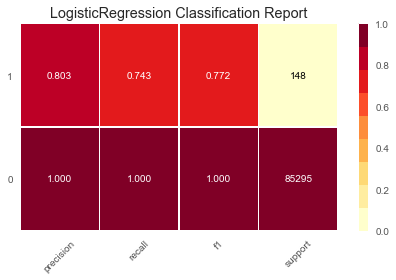

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [159]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(lr, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

_As seen above, model couldn't predict any fraud (1) cases_


You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


In [160]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred_lr)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.60


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.60')

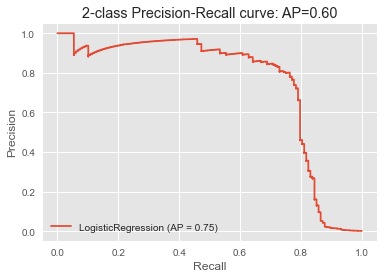

In [161]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(lr, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

***v. Apply and Plot StratifiedKFold***

- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class recall is not sufficient, apply **SMOTE**.

### Apply SMOTE

In [162]:
print('X_train shape:')
print(X_train.shape,'\n')
print('y_train value counts:')
print(y_train.value_counts(),'\n')
print('y_test value counts:')
print(y_test.value_counts(),'\n')

from imblearn.over_sampling import SMOTE
from collections import Counter

# Increasing number of Target 0 equal to Target 1
sm = SMOTE(random_state=42)

X_train_SM, y_train_SM = sm.fit_sample(X_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_train_SM)))

X_train shape:
(199364, 30) 

y_train value counts:
0    199020
1       344
Name: Class, dtype: int64 

y_test value counts:
0    85295
1      148
Name: Class, dtype: int64 

Resampled dataset shape Counter({0: 199020, 1: 199020})


### Logistic Regression with SMOTE

- The steps you are going to cover for this algorithm are as follows:
   
   *i. Train-Test Split (Again)*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Train-Test Split (Again)***

Use SMOTE applied data.

***ii. Model Training***

In [163]:
lrSM = LogisticRegression().fit(X_train_SM,y_train_SM)

***iii. Prediction and Model Evaluating***

In [164]:
y_pred_lrSM = lrSM.predict(X_test)

In [165]:
lrSM.score(X_train_SM,y_train_SM)

0.9619937694704049

In [166]:
scores = cross_val_score(lrSM, X_test, y_test, cv=10)
print('Cross-Validation Accuracy Scores', scores.mean())
print(scores)

Cross-Validation Accuracy Scores 0.9992275609627812
[0.99941486 0.99859567 0.99918081 0.99953184 0.99929775 0.99929775
 0.99918071 0.99929775 0.99929775 0.99918071]


In [167]:
print(confusion_matrix(y_test,y_pred_lrSM))
print(classification_report(y_test,y_pred_lrSM))

[[82923  2372]
 [   19   129]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85295
           1       0.05      0.87      0.10       148

    accuracy                           0.97     85443
   macro avg       0.53      0.92      0.54     85443
weighted avg       1.00      0.97      0.98     85443



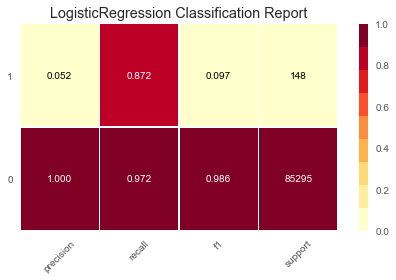

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [168]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(lrSM, support=True)

visualizer.fit(X_train_SM, y_train_SM)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()

***iv.  Plot Precision and Recall Curve***


In [169]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred_lrSM)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.05


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.05')

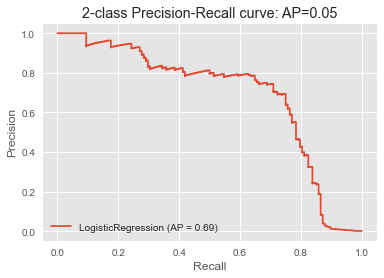

In [170]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(lrSM, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

***v. Apply and Plot StratifiedKFold***

### Random Forest Classifier with SMOTE

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating*
   
   *iii. Plot Precision and Recall Curve*
   
   *iv. Apply and Plot StratifiedKFold*
   

***i. Model Training***

***ii. Prediction and Model Evaluating***

In [171]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(X_train_SM, y_train_SM)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))
confusion_matrix(y_test, y_pred_rf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.88      0.76      0.82       148

    accuracy                           1.00     85443
   macro avg       0.94      0.88      0.91     85443
weighted avg       1.00      1.00      1.00     85443



array([[85280,    15],
       [   35,   113]], dtype=int64)

***iii. Plot Precision and Recall Curve***


In [172]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred_rf)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.67


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.67')

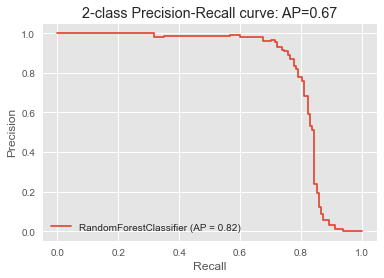

In [173]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(rf, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

***iv. Apply and Plot StratifiedKFold***

### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

In [186]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

***ii. Define Model***

In [181]:
X_train_SM.shape

(398040, 30)

In [182]:
y_train_SM.shape

(398040,)

In [183]:
model = Sequential()
model.add(Dense(30, activation="relu"))
model.add(Dense(15, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

***iii. Compile Model***

In [184]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

***iv. Fit Model***

In [185]:
early_stop = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience = 15)
model.fit(x=X_train_SM, y=y_train_SM, epochs=30, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

Epoch 1/30
12439/12439 [==============================] - 19s 1ms/step - loss: 0.0536 - accuracy: 0.9789 - val_loss: 0.0141 - val_accuracy: 0.9975
Epoch 2/30
12439/12439 [==============================] - 18s 1ms/step - loss: 0.0048 - accuracy: 0.9990 - val_loss: 0.0120 - val_accuracy: 0.9985
Epoch 3/30
12439/12439 [==============================] - 17s 1ms/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 0.0123 - val_accuracy: 0.9984
Epoch 4/30
12439/12439 [==============================] - 15s 1ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0138 - val_accuracy: 0.9982
Epoch 5/30
12439/12439 [==============================] - 17s 1ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0133 - val_accuracy: 0.9983
Epoch 6/30
12439/12439 [==============================] - 16s 1ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0145 - val_accuracy: 0.9980
Epoch 7/30
12439/12439 [==============================] - 14s 1ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0

***v. Prediction and Model Evaluating***

In [187]:
model_loss = pd.DataFrame(model.history.history)

In [188]:
model_loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.02,0.99,0.01,1.00
1,0.00,1.00,0.01,1.00
2,0.00,1.00,0.01,1.00
3,0.00,1.00,0.01,1.00
4,0.00,1.00,0.01,1.00


<AxesSubplot:>

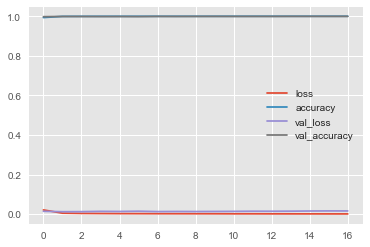

In [189]:
model_loss.plot()

In [190]:
predictions = model.predict_classes(X_test)

In [191]:
print(classification_report(y_test, predictions))
confusion_matrix(y_test, predictions)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.72      0.73      0.72       148

    accuracy                           1.00     85443
   macro avg       0.86      0.86      0.86     85443
weighted avg       1.00      1.00      1.00     85443



array([[85253,    42],
       [   40,   108]], dtype=int64)

***vi. Plot Precision and Recall Curve***

## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to *Pycharm* and create your web app with Flask API.

### Save and Export the Model as .pkl


### Save and Export Variables as .pkl

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___